# POST/GET请求以及如何在Android Studio中调用的示例

以下是所有HTTP指令的格式说明，包括注册用户、登录账号、创建群聊、获取群聊消息、发送消息、添加成员和删除成员。

### 1. 注册用户

**URL**: `http://localhost:5000/api/users/register`  
**Method**: `POST`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**:


In [ ]:
{
  "username": "testuser",
  "email": "testuser@example.com",
  "password": "testpassword"
}



### 2. 登录账号

**URL**: `http://localhost:5000/api/users/login`  
**Method**: `POST`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**:


In [ ]:
{
  "email": "testuser@example.com",
  "password": "testpassword"
}



### 3. 创建群聊

**URL**: `http://localhost:5000/api/groups/create`  
**Method**: `POST`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**:


In [ ]:
{
  "name": "Test Group",
  "members": ["60d5f9b5f1d2c72a3c8e4b1a", "60d5f9b5f1d2c72a3c8e4b1b"]
}



### 4. 获取群聊消息

**URL**: `http://localhost:5000/api/groups/{groupId}/messages`  
**Method**: `GET`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**: 无

### 5. 发送消息

**URL**: `http://localhost:5000/api/groups/{groupId}/messages`  
**Method**: `POST`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**:


In [ ]:
{
  "sender": "60d5f9b5f1d2c72a3c8e4b1a",
  "content": "Hello, this is a test message."
}



### 6. 添加成员

**URL**: `http://localhost:5000/api/groups/{groupId}/addMember`  
**Method**: `POST`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**:


In [ ]:
{
  "memberId": "60d5f9b5f1d2c72a3c8e4b1a"
}



### 7. 删除成员

**URL**: `http://localhost:5000/api/groups/{groupId}/removeMember`  
**Method**: `POST`  
**Headers**: 


In [ ]:
Content-Type: application/json

**Body**:


In [ ]:
{
  "memberId": "60d5f9b5f1d2c72a3c8e4b1a"
}



### 完整的 

app.js

 文件

确保在 

app.js

 文件中正确配置了所有路由：



In [ ]:
const express = require('express');
const mongoose = require('mongoose');
const userRouter = require('./routes/user');
const groupRouter = require('./routes/group');
require('dotenv').config();

const app = express();
const port = process.env.PORT || 3001;

// 中间件
app.use(express.json());

// 连接MongoDB
mongoose.connect(process.env.MONGODB_URI, { useNewUrlParser: true, useUnifiedTopology: true })
  .then(() => console.log('Connected to MongoDB'))
  .catch(err => console.error('Could not connect to MongoDB', err));

// 路由
app.use('/api/users', userRouter);
app.use('/api/groups', groupRouter);

// 启动服务器
app.listen(port, () => {
  console.log(`Server is running on port ${port}`);
});

使用POSTMAN测试
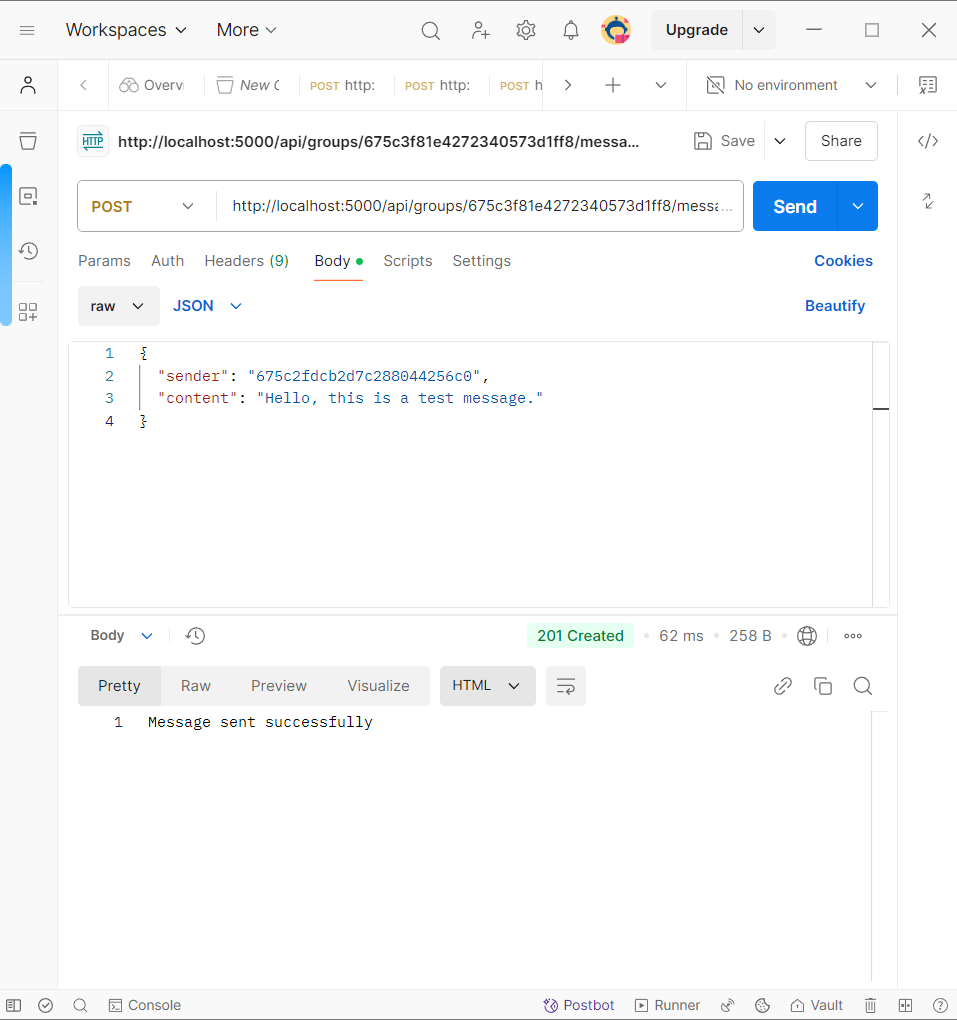

为了在安卓端调用你的API并实现用户登录、注册、发送消息和展示消息的功能，你可以使用Retrofit库来进行网络请求。以下是具体步骤：

### 1. 添加Retrofit依赖

在你的`build.gradle`文件中添加Retrofit和Gson依赖：



In [ ]:
implementation 'com.squareup.retrofit2:retrofit:2.9.0'
implementation 'com.squareup.retrofit2:converter-gson:2.9.0'



### 2. 创建API接口

定义一个接口来描述与后端API的交互。

`ApiService.java`：


In [ ]:
import retrofit2.Call;
import retrofit2.http.Body;
import retrofit2.http.GET;
import retrofit2.http.POST;
import retrofit2.http.Path;

public interface ApiService {
    @POST("/api/users/register")
    Call<Void> registerUser(@Body User user);

    @POST("/api/users/login")
    Call<LoginResponse> loginUser(@Body LoginRequest loginRequest);

    @POST("/api/groups/create")
    Call<Void> createGroup(@Body Group group);

    @GET("/api/groups/{groupId}/messages")
    Call<List<Message>> getGroupMessages(@Path("groupId") String groupId);

    @POST("/api/groups/{groupId}/messages")
    Call<Void> sendMessage(@Path("groupId") String groupId, @Body Message message);

    @POST("/api/groups/{groupId}/addMember")
    Call<Void> addMember(@Path("groupId") String groupId, @Body MemberRequest memberRequest);

    @POST("/api/groups/{groupId}/removeMember")
    Call<Void> removeMember(@Path("groupId") String groupId, @Body MemberRequest memberRequest);
}



### 3. 创建Retrofit实例

创建一个Retrofit实例来执行网络请求。

`ApiClient.java`：


In [ ]:
import retrofit2.Retrofit;
import retrofit2.converter.gson.GsonConverterFactory;

public class ApiClient {
    private static final String BASE_URL = "http://localhost:3001";
    private static Retrofit retrofit;

    public static Retrofit getRetrofitInstance() {
        if (retrofit == null) {
            retrofit = new Retrofit.Builder()
                    .baseUrl(BASE_URL)
                    .addConverterFactory(GsonConverterFactory.create())
                    .build();
        }
        return retrofit;
    }
}



### 4. 创建数据模型

创建数据模型类来表示用户、登录请求、群聊、消息等。

`User.java`：


In [ ]:
public class User {
    private String username;
    private String email;
    private String password;

    // Constructors, getters, and setters
}



`LoginRequest.java`：


In [ ]:
public class LoginRequest {
    private String email;
    private String password;

    // Constructors, getters, and setters
}



`LoginResponse.java`：


In [ ]:
public class LoginResponse {
    private String token;

    // Constructors, getters, and setters
}



`Group.java`：


In [ ]:
public class Group {
    private String name;
    private List<String> members;

    // Constructors, getters, and setters
}



`Message.java`：


In [ ]:
public class Message {
    private String sender;
    private String content;

    // Constructors, getters, and setters
}



`MemberRequest.java`：


In [ ]:
public class MemberRequest {
    private String memberId;

    // Constructors, getters, and setters
}



### 5. 实现用户登录和注册界面

在你的Activity中使用Retrofit进行网络请求。

`LoginActivity.java`：


In [ ]:
import android.os.Bundle;
import android.widget.Button;
import android.widget.EditText;
import android.widget.Toast;
import androidx.appcompat.app.AppCompatActivity;
import retrofit2.Call;
import retrofit2.Callback;
import retrofit2.Response;

public class LoginActivity extends AppCompatActivity {
    private ApiService apiService;

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_login);

        apiService = ApiClient.getRetrofitInstance().create(ApiService.class);

        EditText emailEditText = findViewById(R.id.email);
        EditText passwordEditText = findViewById(R.id.password);
        Button loginButton = findViewById(R.id.login_button);

        loginButton.setOnClickListener(v -> {
            String email = emailEditText.getText().toString();
            String password = passwordEditText.getText().toString();
            loginUser(email, password);
        });
    }

    private void loginUser(String email, String password) {
        LoginRequest loginRequest = new LoginRequest(email, password);
        apiService.loginUser(loginRequest).enqueue(new Callback<LoginResponse>() {
            @Override
            public void onResponse(Call<LoginResponse> call, Response<LoginResponse> response) {
                if (response.isSuccessful()) {
                    String token = response.body().getToken();
                    // Save token and navigate to the next screen
                    Toast.makeText(LoginActivity.this, "Login successful", Toast.LENGTH_SHORT).show();
                } else {
                    Toast.makeText(LoginActivity.this, "Login failed", Toast.LENGTH_SHORT).show();
                }
            }

            @Override
            public void onFailure(Call<LoginResponse> call, Throwable t) {
                Toast.makeText(LoginActivity.this, "Network error", Toast.LENGTH_SHORT).show();
            }
        });
    }
}



`RegisterActivity.java`：


In [ ]:
import android.os.Bundle;
import android.widget.Button;
import android.widget.EditText;
import android.widget.Toast;
import androidx.appcompat.app.AppCompatActivity;
import retrofit2.Call;
import retrofit2.Callback;
import retrofit2.Response;

public class RegisterActivity extends AppCompatActivity {
    private ApiService apiService;

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_register);

        apiService = ApiClient.getRetrofitInstance().create(ApiService.class);

        EditText usernameEditText = findViewById(R.id.username);
        EditText emailEditText = findViewById(R.id.email);
        EditText passwordEditText = findViewById(R.id.password);
        Button registerButton = findViewById(R.id.register_button);

        registerButton.setOnClickListener(v -> {
            String username = usernameEditText.getText().toString();
            String email = emailEditText.getText().toString();
            String password = passwordEditText.getText().toString();
            registerUser(username, email, password);
        });
    }

    private void registerUser(String username, String email, String password) {
        User user = new User(username, email, password);
        apiService.registerUser(user).enqueue(new Callback<Void>() {
            @Override
            public void onResponse(Call<Void> call, Response<Void> response) {
                if (response.isSuccessful()) {
                    Toast.makeText(RegisterActivity.this, "Registration successful", Toast.LENGTH_SHORT).show();
                    // Navigate to login screen
                } else {
                    Toast.makeText(RegisterActivity.this, "Registration failed", Toast.LENGTH_SHORT).show();
                }
            }

            @Override
            public void onFailure(Call<Void> call, Throwable t) {
                Toast.makeText(RegisterActivity.this, "Network error", Toast.LENGTH_SHORT).show();
            }
        });
    }
}



### 6. 实现消息界面

在你的Activity中使用Retrofit获取和发送消息。

`ChatActivity.java`：


In [ ]:
import android.os.Bundle;
import android.widget.Button;
import android.widget.EditText;
import android.widget.ListView;
import android.widget.Toast;
import androidx.appcompat.app.AppCompatActivity;
import java.util.List;
import retrofit2.Call;
import retrofit2.Callback;
import retrofit2.Response;

public class ChatActivity extends AppCompatActivity {
    private ApiService apiService;
    private String groupId;
    private String userId;
    private ListView messagesListView;
    private MessagesAdapter messagesAdapter;

    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_chat);

        apiService = ApiClient.getRetrofitInstance().create(ApiService.class);

        groupId = getIntent().getStringExtra("GROUP_ID");
        userId = getIntent().getStringExtra("USER_ID");

        messagesListView = findViewById(R.id.messages_list_view);
        messagesAdapter = new MessagesAdapter(this, R.layout.message_item);
        messagesListView.setAdapter(messagesAdapter);

        EditText messageEditText = findViewById(R.id.message_edit_text);
        Button sendButton = findViewById(R.id.send_button);

        sendButton.setOnClickListener(v -> {
            String content = messageEditText.getText().toString();
            sendMessage(content);
        });

        loadMessages();
    }

    private void loadMessages() {
        apiService.getGroupMessages(groupId).enqueue(new Callback<List<Message>>() {
            @Override
            public void onResponse(Call<List<Message>> call, Response<List<Message>> response) {
                if (response.isSuccessful()) {
                    List<Message> messages = response.body();
                    messagesAdapter.clear();
                    messagesAdapter.addAll(messages);
                } else {
                    Toast.makeText(ChatActivity.this, "Failed to load messages", Toast.LENGTH_SHORT).show();
                }
            }

            @Override
            public void onFailure(Call<List<Message>> call, Throwable t) {
                Toast.makeText(ChatActivity.this, "Network error", Toast.LENGTH_SHORT).show();
            }
        });
    }

    private void sendMessage(String content) {
        Message message = new Message(userId, content);
        apiService.sendMessage(groupId, message).enqueue(new Callback<Void>() {
            @Override
            public void onResponse(Call<Void> call, Response<Void> response) {
                if (response.isSuccessful()) {
                    loadMessages();
                    Toast.makeText(ChatActivity.this, "Message sent", Toast.LENGTH_SHORT).show();
                } else {
                    Toast.makeText(ChatActivity.this, "Failed to send message", Toast.LENGTH_SHORT).show();
                }
            }

            @Override
            public void onFailure(Call<Void> call, Throwable t) {
                Toast.makeText(ChatActivity.this, "Network error", Toast.LENGTH_SHORT).show();
            }
        });
    }
}



### 7. 创建消息适配器

创建一个适配器来显示消息列表。

`MessagesAdapter.java`：


In [ ]:
import android.content.Context;
import android.view.LayoutInflater;
import android.view.View;
import android.view.ViewGroup;
import android.widget.ArrayAdapter;
import android.widget.TextView;
import java.util.List;

public class MessagesAdapter extends ArrayAdapter<Message> {
    private int resource;

    public MessagesAdapter(Context context, int resource) {
        super(context, resource);
        this.resource = resource;
    }

    @Override
    public View getView(int position, View convertView, ViewGroup parent) {
        Message message = getItem(position);
        if (convertView == null) {
            convertView = LayoutInflater.from(getContext()).inflate(resource, parent, false);
        }

        TextView senderTextView = convertView.findViewById(R.id.sender_text_view);
        TextView contentTextView = convertView.findViewById(R.id.content_text_view);

        senderTextView.setText(message.getSender());
        contentTextView.setText(message.getContent());

        return convertView;
    }
}



### 8. 创建布局文件

创建相应的布局文件来实现用户界面。

`activity_login.xml`：


In [ ]:
<LinearLayout xmlns:android="http://schemas.android.com/apk/res/android"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    android:orientation="vertical"
    android:padding="16dp">

    <EditText
        android:id="@+id/email"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:hint="Email" />

    <EditText
        android:id="@+id/password"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:hint="Password"
        android:inputType="textPassword" />

    <Button
        android:id="@+id/login_button"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:text="Login" />
</LinearLayout>



`activity_register.xml`：


In [ ]:
<LinearLayout xmlns:android="http://schemas.android.com/apk/res/android"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    android:orientation="vertical"
    android:padding="16dp">

    <EditText
        android:id="@+id/username"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:hint="Username" />

    <EditText
        android:id="@+id/email"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:hint="Email" />

    <EditText
        android:id="@+id/password"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:hint="Password"
        android:inputType="textPassword" />

    <Button
        android:id="@+id/register_button"
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:text="Register" />
</LinearLayout>



`activity_chat.xml`：


In [ ]:
<LinearLayout xmlns:android="http://schemas.android.com/apk/res/android"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    android:orientation="vertical"
    android:padding="16dp">

    <ListView
        android:id="@+id/messages_list_view"
        android:layout_width="match_parent"
        android:layout_height="0dp"
        android:layout_weight="1" />

    <LinearLayout
        android:layout_width="match_parent"
        android:layout_height="wrap_content"
        android:orientation="horizontal">

        <EditText
            android:id="@+id/message_edit_text"
            android:layout_width="0dp"
            android:layout_height="wrap_content"
            android:layout_weight="1"
            android:hint="Type a message" />

        <Button
            android:id="@+id/send_button"
            android:layout_width="wrap_content"
            android:layout_height="wrap_content"
            android:text="Send" />
    </LinearLayout>
</LinearLayout>



`message_item.xml`：


In [ ]:
<LinearLayout xmlns:android="http://schemas.android.com/apk/res/android"
    android:layout_width="match_parent"
    android:layout_height="wrap_content"
    android:orientation="vertical"
    android:padding="8dp">

    <TextView
        android:id="@+id/sender_text_view"
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:textStyle="bold" />

    <TextView
        android:id="@+id/content_text_view"
        android:layout_width="wrap_content"
        android:layout_height="wrap_content" />
</LinearLayout>



通过这些步骤，你可以在安卓端实现用户登录、注册、发送消息和展示消息的功能。确保在实际应用中处理好网络请求的错误和异常情况，并根据需要进行进一步的优化和改进。

找到具有 1 个许可证类型的类似代码